### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 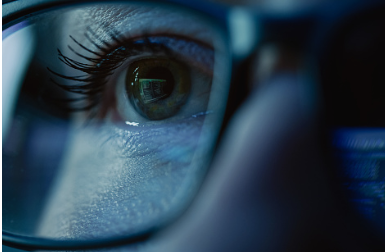 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [53]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from tensorflow.keras.preprocessing import image


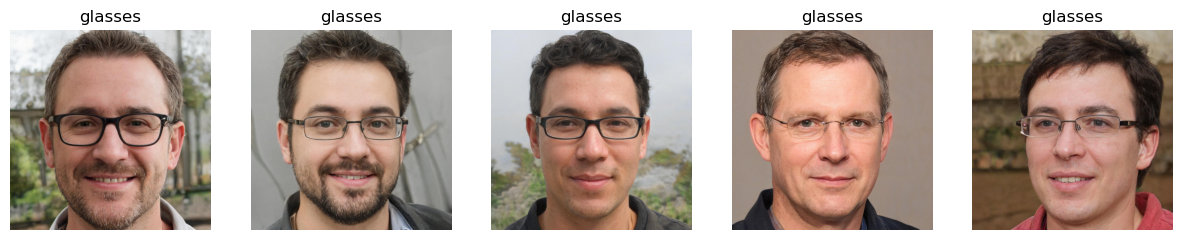

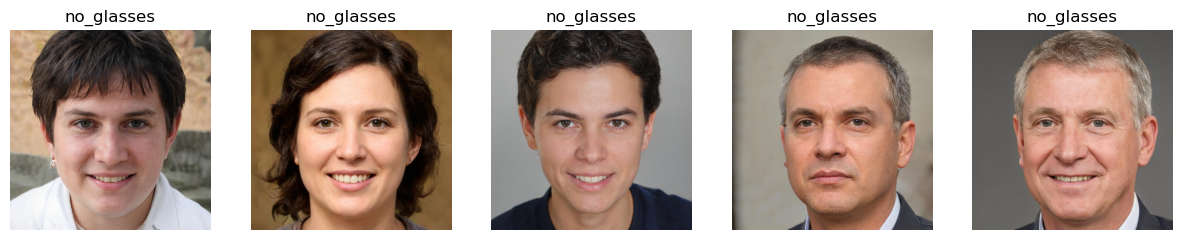

In [6]:
def show_sample_images(base_path, class_name, n=5):
    class_path = os.path.join(base_path, class_name)
    images = os.listdir(class_path)[:n]
    
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
    plt.show()

base_dir = r"C:\Users\brajagopal\Music\glasses_dataset\glasses"

# samples from both classes
show_sample_images(base_dir, 'glasses')
show_sample_images(base_dir, 'no_glasses')


In [8]:
# image size and batch
IMG_SIZE = (128, 128)
BATCH_SIZE = 16

# CNN Model
model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten + Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(2, activation='softmax'))  # 2 classes: glasses, no_glasses

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\brajagopal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
'''In the CNN model, the Conv2D layers use filters to automatically extract important features like edges or patterns from the input images, 
and increasing the number of filters (like 32, 64, 128) allows the model to detect more complex features as it goes deeper; 
the kernel size determines the area scanned in each pass and smaller sizes (like 3x3) help preserve spatial detail,
while the activation='relu' adds non-linearity so the model can learn complex mappings;
MaxPooling2D reduces the spatial dimensions and computation while keeping the key features,
helping the model generalize better; Flatten converts the 2D feature maps into a 1D vector before entering dense layers,
and the Dense layer with 128 units and ReLU activation learns high-level representations;
Dropout randomly turns off some neurons during training to prevent overfitting,
and the final Dense layer with softmax activation outputs probabilities for each class,
allowing the model to classify images as "with glasses" or "without glasses";
all these parameters together determine the model’s depth, learning capacity, and ability to generalize from the dataset.'''

'In the CNN model, the Conv2D layers use filters to automatically extract important features like edges or patterns from the input images, \nand increasing the number of filters (like 32, 64, 128) allows the model to detect more complex features as it goes deeper; \nthe kernel size determines the area scanned in each pass and smaller sizes (like 3x3) help preserve spatial detail,\nwhile the activation=\'relu\' adds non-linearity so the model can learn complex mappings;\nMaxPooling2D reduces the spatial dimensions and computation while keeping the key features,\nhelping the model generalize better; Flatten converts the 2D feature maps into a 1D vector before entering dense layers,\nand the Dense layer with 128 units and ReLU activation learns high-level representations;\nDropout randomly turns off some neurons during training to prevent overfitting,\nand the final Dense layer with softmax activation outputs probabilities for each class,\nallowing the model to classify images as "with gl

In [10]:
train_dir = r"C:\Users\brajagopal\Music\glasses_dataset\glasses"

# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,        
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    brightness_range=[0.8, 1.2]
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 69 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [52]:
'''i have applied transformations like rotation, zoom, flip, shear, and brightness adjustment using ImageDataGenerator.
Image augmentation significantly improved the model’s ability to generalize by simulating real-world variations,
helping it perform better on unseen data'''

'i have applied transformations like rotation, zoom, flip, shear, and brightness adjustment using ImageDataGenerator.\nImage augmentation significantly improved the model’s ability to generalize by simulating real-world variations,\nhelping it perform better on unseen data'

In [11]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,                   
    validation_data=val_generator
)


Epoch 1/20


C:\Users\brajagopal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 900ms/step - accuracy: 0.5561 - loss: 0.7224 - val_accuracy: 0.7059 - val_loss: 0.6014
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.6650 - loss: 0.6594 - val_accuracy: 0.7059 - val_loss: 0.5995
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.7548 - loss: 0.5829 - val_accuracy: 0.7059 - val_loss: 0.5701
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.7288 - loss: 0.5384 - val_accuracy: 0.7059 - val_loss: 0.5230
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step - accuracy: 0.6521 - loss: 0.5577 - val_accuracy: 0.7059 - val_loss: 0.6251
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.7760 - loss: 0.4333 - val_accuracy: 0.8824 - val_loss: 0.4782
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.8621 - loss: 0.3892 - val_accuracy: 0.7647 - val_loss: 0.3321
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.7465 - loss: 0.3701 - val_accuracy: 0.8824 - val_loss: 0.2905
Ep

In [51]:
'''we have used 20 epochs so that it could avoid overfitting and have a good balance between training and validation performance.
we have used batch size 16 for better generalization for small dataset.'''

'we have used 20 epochs so that it could avoid overfitting and have a good balance between training and validation performance.\nwe have used batch size 16v for better generalization for small dataset.'

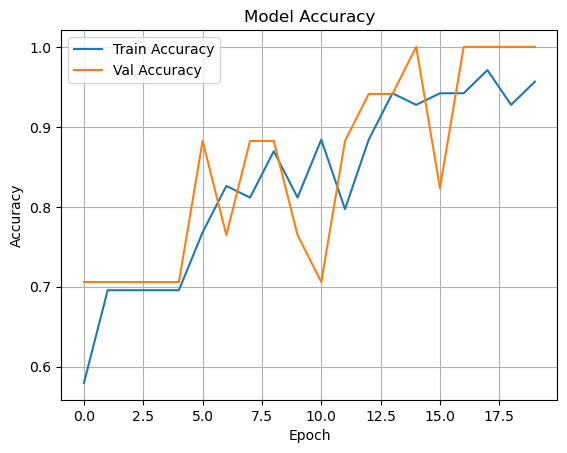

In [13]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


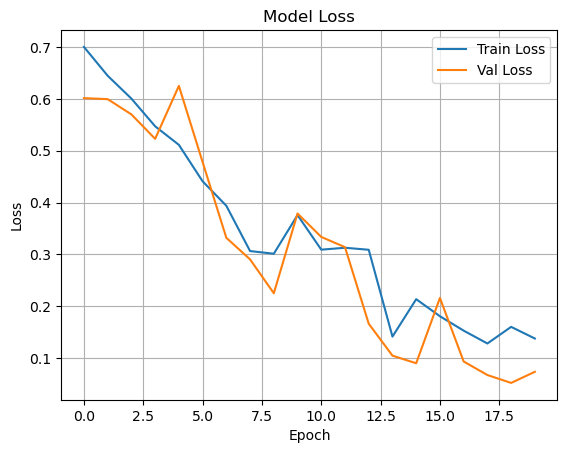

In [14]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


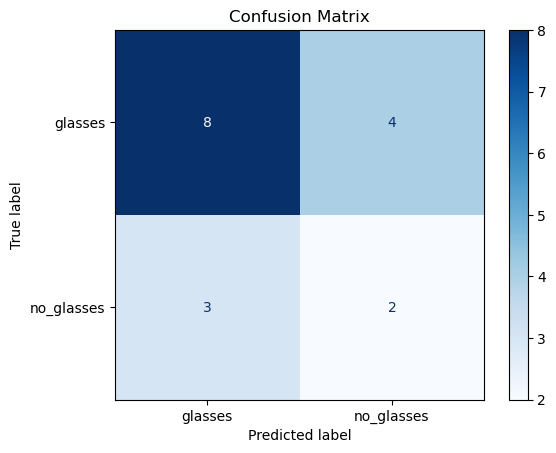

✅ Validation Accuracy: 58.82%

📋 Classification Report:
              precision    recall  f1-score   support

     glasses       0.73      0.67      0.70        12
  no_glasses       0.33      0.40      0.36         5

    accuracy                           0.59        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.61      0.59      0.60        17



In [27]:
# Get true labels from validation generator
Y_true = val_generator.classes

# Predict classes (as probabilities)
Y_pred = model.predict(val_generator)

# Convert predicted probabilities to class indices
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Display Confusion Matrix
labels = list(val_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Compute and print Accuracy
acc = accuracy_score(Y_true, Y_pred_classes)
print(f" Validation Accuracy: {acc * 100:.2f}%")

# Detailed performance metrics
print("\n Classification Report:")
print(classification_report(Y_true, Y_pred_classes, target_names=labels))


In [28]:
# Mapping label indices to class names
class_labels = list(val_generator.class_indices.keys())  

def predict_glasses(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence*100:.2f}%)")
    plt.show()

    return class_labels[predicted_class], confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


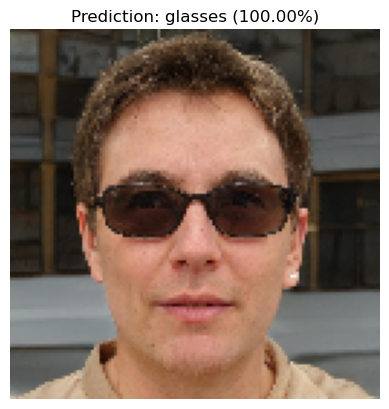


This person is: GLASSES with 100.00% confidence.


In [36]:
image_path = r"C:\Users\brajagopal\Music\glasses_3_3_1 (1)\glasses\glasses\face-133.jpg"
predicted_class, confidence = predict_glasses(image_path, model)
print(f"\nThis person is: {predicted_class.upper()} with {confidence*100:.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


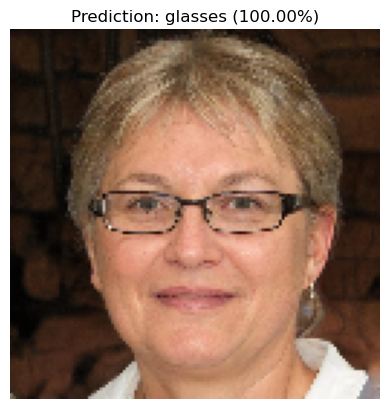


 This person is: GLASSES with 100.00% confidence.


In [35]:
image_path = r"C:\Users\brajagopal\Music\glasses_3_3_1 (1)\glasses\glasses\face-979.jpg" 
predicted_class, confidence = predict_glasses(image_path, model)
print(f"\n This person is: {predicted_class.upper()} with {confidence*100:.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


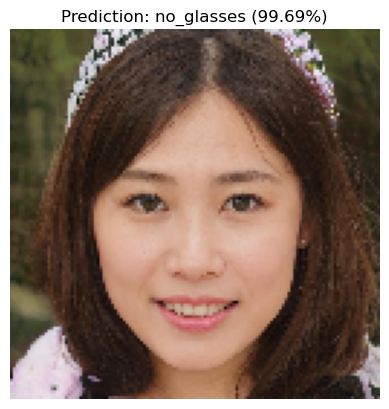


 This person is: NO_GLASSES with 99.69% confidence.


In [37]:
image_path = r"C:\Users\brajagopal\Music\glasses_3_3_1 (1)\glasses\no_glasses\face-2095.jpg"
predicted_class, confidence = predict_glasses(image_path, model)
print(f"\n This person is: {predicted_class.upper()} with {confidence*100:.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


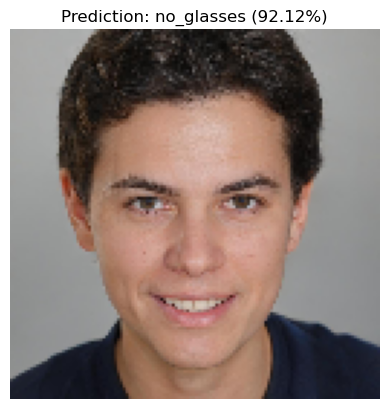


 This person is: NO_GLASSES with 92.12% confidence.


In [38]:
image_path = r"C:\Users\brajagopal\Music\glasses_3_3_1 (1)\glasses\no_glasses\face-1060.jpg"
predicted_class, confidence = predict_glasses(image_path, model)
print(f"\n This person is: {predicted_class.upper()} with {confidence*100:.2f}% confidence.")